<a href="https://colab.research.google.com/github/Thebtiboutheina/Flight-Price-Prediction/blob/main/Flight_Price_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install -q kaggle


In [59]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle (2).json to kaggle (2).json


In [62]:
!kaggle datasets download -d shubhambathwal/flight-price-prediction

  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 153MB/s]


In [63]:
!unzip \*.zip


Archive:  flight-price-prediction.zip
  inflating: Clean_Dataset.csv       
  inflating: business.csv            
  inflating: economy.csv             


# Imports

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing

In [64]:
#load the dataset
data = pd.read_csv('Clean_Dataset.csv', usecols=lambda col: col!='Unnamed: 0')
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [44]:
# Get size and shape of our dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


Our dataframe consists of 300153 rows and 11 columns. Most of our data is not numerical

Now let's answer each research question:

# **a) Does price vary with Airlines?**

In [45]:
# Group by airline and calculate mean price
mean_price_by_airline = data.groupby('airline')['price'].mean()

print(mean_price_by_airline)


airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64


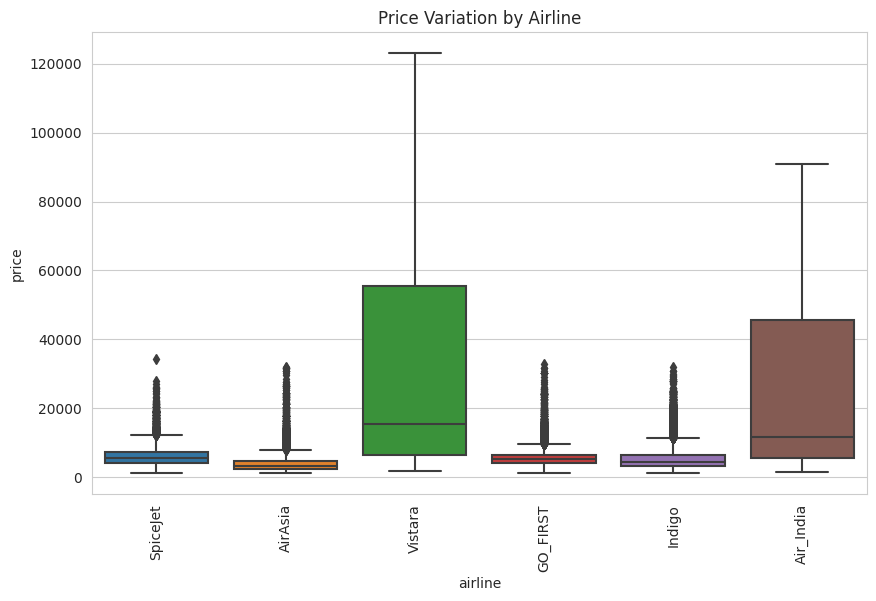

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='airline', y='price', data=data)
plt.title('Price Variation by Airline')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability if needed
plt.show()


Based on the output you've provided by comparing the mean of tickets across the different airline, it seems that 'Vistara' has the highest average price, and 'AirAsia' has the lowest. This could suggest that 'Vistara' is a more premium airline, or possibly offers more benefits or conveniences that cause its prices to be higher. On the other hand, 'AirAsia' appears to be the most budget-friendly option, with the lowest average price. 'Air India' also has a high average price, which may suggest similar quality or benefits to 'Vistara'. The airlines 'GO_FIRST', 'Indigo', and 'SpiceJet' have relatively closer average prices, indicating they might be competing in the same market segment.

# **b) How is the price affected when tickets are bought in just 1 or 2 days before departure?**


In [47]:
#average price 1, 2 and 10 days before the departure
days_before_departure = [1, 2, 10]

for airline in data['airline'].unique():
    print(f"Airline: {airline}")
    for days in days_before_departure:
        subset = data[(data['airline'] == airline) & (data['days_left'] == days)]
        print(f"Average price {days} day(s) before departure: {subset['price'].mean()}")
    print("\n")

Airline: SpiceJet
Average price 1 day(s) before departure: 13136.91304347826
Average price 2 day(s) before departure: 11362.181818181818
Average price 10 day(s) before departure: 8162.170506912443


Airline: AirAsia
Average price 1 day(s) before departure: 10867.710843373494
Average price 2 day(s) before departure: 9374.676923076922
Average price 10 day(s) before departure: 10112.173333333334


Airline: Vistara
Average price 1 day(s) before departure: 28188.201949860726
Average price 2 day(s) before departure: 39808.801423027166
Average price 10 day(s) before departure: 34163.09281095474


Airline: GO_FIRST
Average price 1 day(s) before departure: 11512.7125
Average price 2 day(s) before departure: 12028.418439716312
Average price 10 day(s) before departure: 9371.48085106383


Airline: Indigo
Average price 1 day(s) before departure: 13816.153477218226
Average price 2 day(s) before departure: 12166.580487804878
Average price 10 day(s) before departure: 8839.140495867769


Airline: Air_I

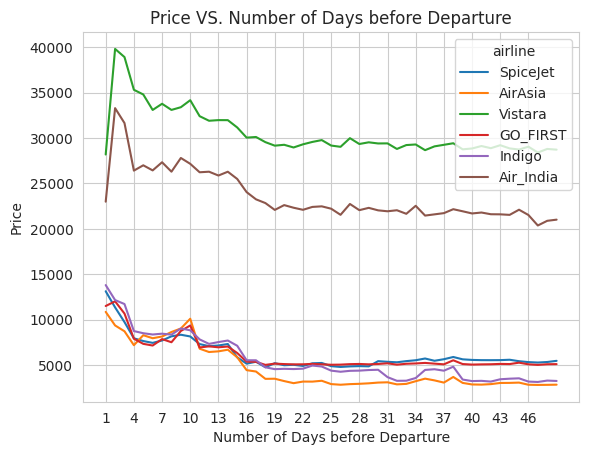

In [48]:

sns.set_style('whitegrid')
sns.lineplot(x='days_left', y='price', hue='airline', data=data, errorbar=None)
plt.xticks(range(data['days_left'].min(), data['days_left'].max(), 3))
plt.title('Price VS. Number of Days before Departure')
plt.ylabel('Price')
plt.xlabel('Number of Days before Departure');

When looking at the ticket prices across various airlines as the departure date nears, a common trend emerges for most airlines: ticket prices tend to increase as the departure date gets closer.



*   SpiceJet, AirAsia, and Indigo: These airlines appear to increase ticket prices as the departure date nears, potentially capitalizing on less price-sensitive, last-minute bookers. The prices are the most inexpensive 10 days before departure and most expensive 1 day before departure.
*   Vistara, GO_FIRST, and Air India: These airlines show a slightly different trend, with ticket prices peaking 2 days before departure. This might be a result of higher demand or fewer available seats during this period.





# **c) Does ticket price change based on the departure time and arrival time?**

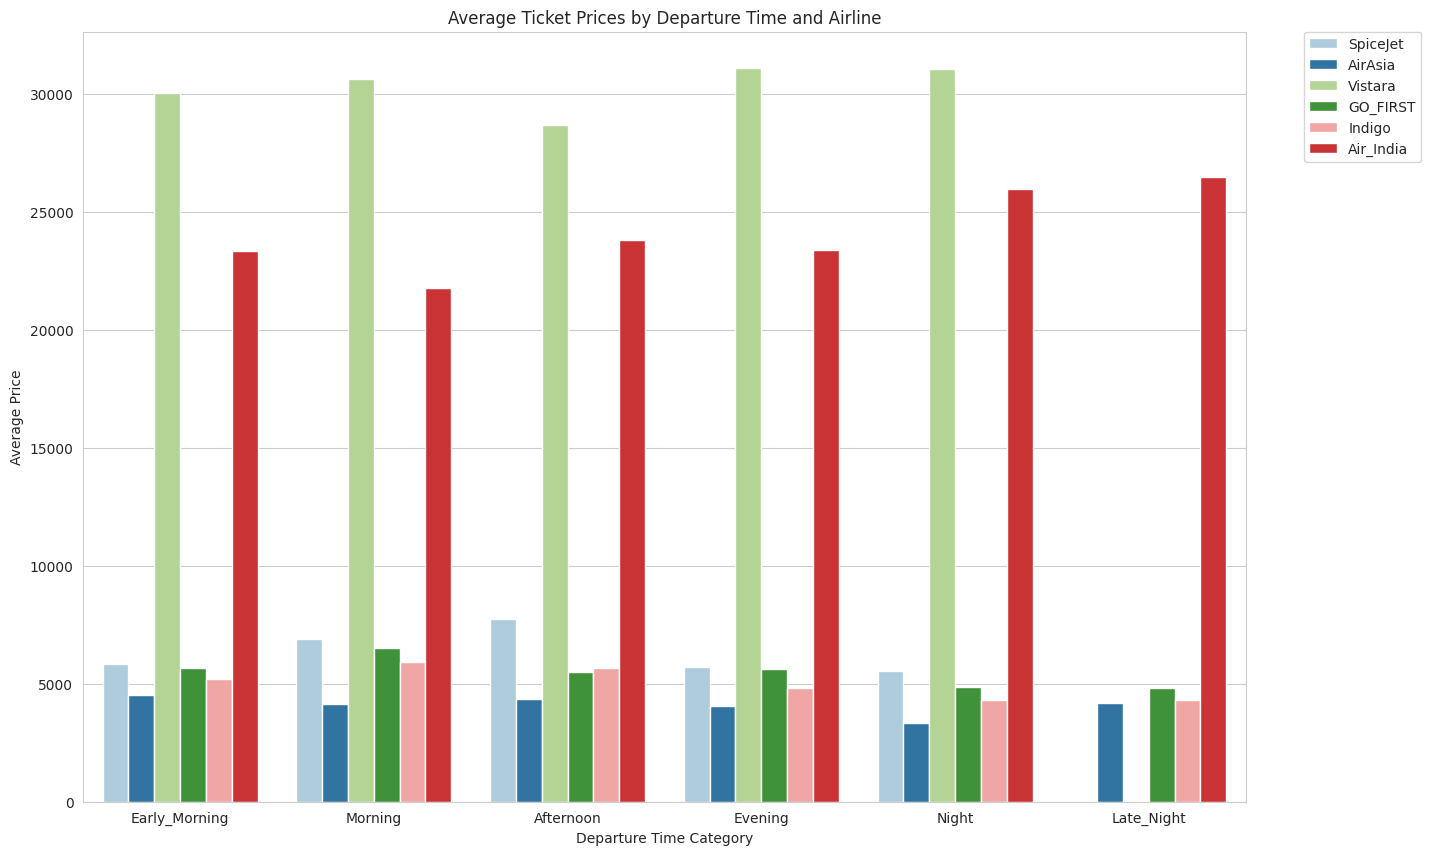

In [49]:
time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']

# Define a custom color palette
custom_palette = sns.color_palette("Paired", len(data['airline'].unique()))

plt.figure(figsize=(15,10))
sns.barplot(x='departure_time', y='price', hue='airline', data=data, order=time_order, errorbar=None, palette=custom_palette)
plt.title('Average Ticket Prices by Departure Time and Airline')
plt.xlabel('Departure Time Category')
plt.ylabel('Average Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


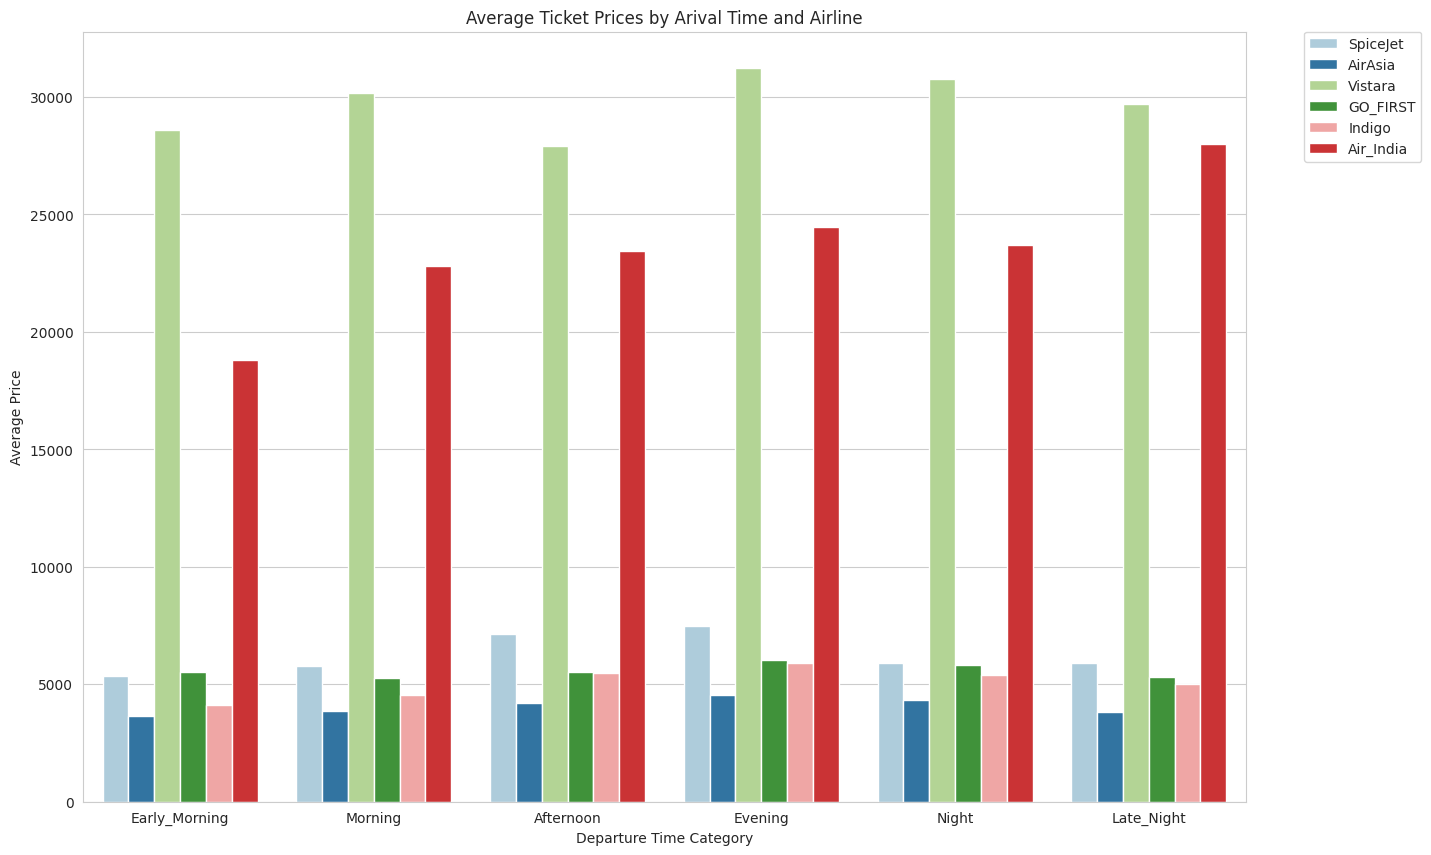

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = sns.color_palette("Paired", len(data['airline'].unique()))

plt.figure(figsize=(15,10))
sns.barplot(x='arrival_time', y='price', hue='airline', data=data, order=time_order, errorbar=None, palette=custom_palette)
plt.title('Average Ticket Prices by Arival Time and Airline')
plt.xlabel('Departure Time Category')
plt.ylabel('Average Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# **d) How the price changes with change in Source and Destination?**


<ipython-input-51-d0c304ec706f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['route'] = df_filtered['source_city'] + " to " + df_filtered['destination_city']


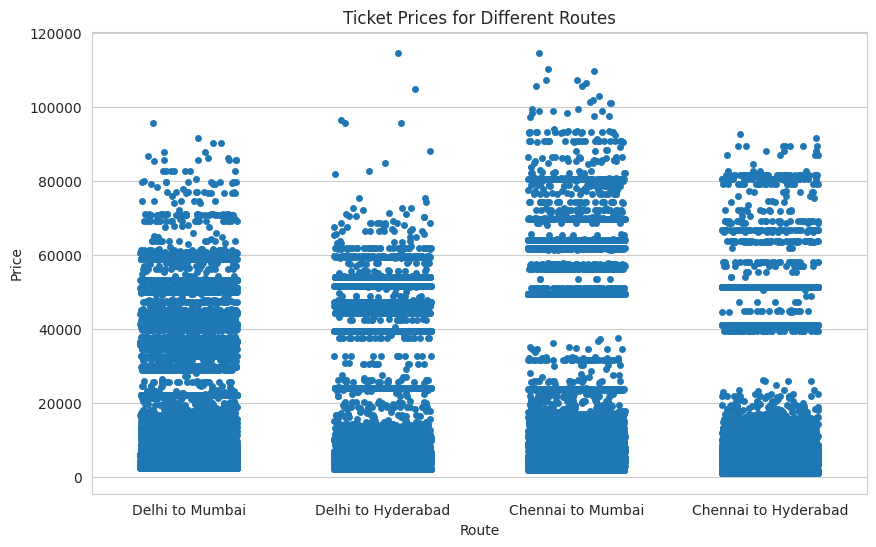

In [51]:
# Let's say we want to compare flights from Delhi to Mumbai and from Chennai to Hyderabad
df_filtered = data[data['source_city'].isin(['Delhi', 'Chennai']) & data['destination_city'].isin(['Mumbai', 'Hyderabad'])]
# Create a new column 'route' that concatenates the source and destination city
df_filtered['route'] = df_filtered['source_city'] + " to " + df_filtered['destination_city']

# Plot using seaborn
import seaborn as sns
plt.figure(figsize=(10,6))
sns.stripplot(x='route', y='price', data=df_filtered, jitter=0.25)
plt.title('Ticket Prices for Different Routes')
plt.ylabel('Price')
plt.xlabel('Route');


# **e) How does the ticket price vary between Economy and Business class?**


A visual representation of the distribution of flight classes (Economic and Business) in the dataset.

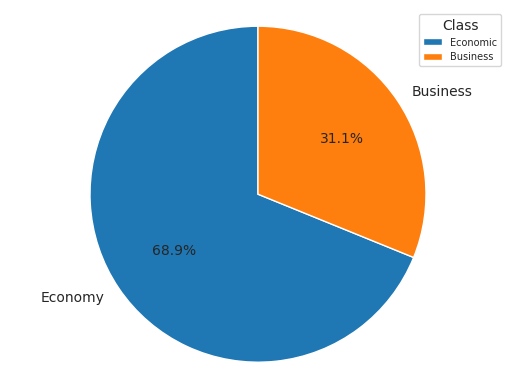

In [55]:
from pandas.core.frame import DataFrame

df= data['class']
df = pd.DataFrame(df)

# Count the occurrences of each type
type_counts = df['class'].value_counts()

# Plot the pie chart
plt.pie(type_counts, labels=type_counts.index, startangle=90, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Set the font size for the legend and title
plt.legend([ 'Economic', 'Business'], title="Class", fontsize=7)
plt.show()


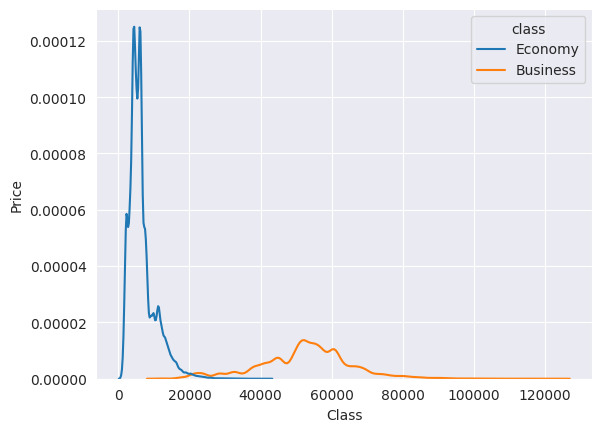

In [56]:
sns.set_style('darkgrid')
sns.kdeplot(x='price', hue='class', data=data)
plt.title('')
plt.ylabel('Price')
plt.xlabel('Class');

When we factor in the 'Class' variable into our analysis, the difference in ticket prices becomes evident. Business Class tickets are more costly compared to Economy Class tickets for flights of the same duration, which essentially implies they are the same flight. This is consistent with our intuition and general knowledge that Business Class services, given their premium amenities and comfort, come at a higher price than Economy Class for the same flight.

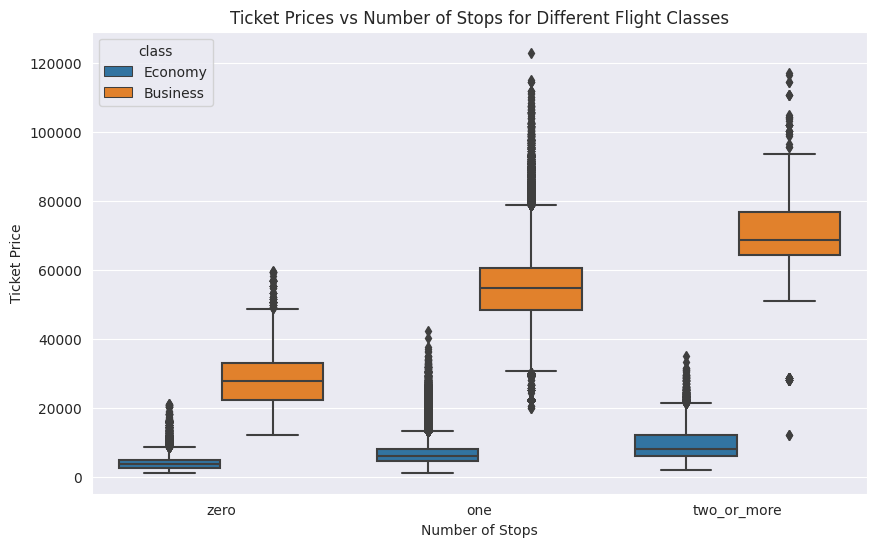

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(x='stops', y='price', hue='class', data=data)
plt.title('Ticket Prices vs Number of Stops for Different Flight Classes')
plt.xlabel('Number of Stops')
plt.ylabel('Ticket Price')
plt.show()

It's shown that flights with two stops are more expensive than those with one stop, and flights with one stop are more expensive than non-stop flights, irrespective of the flight class (Economy or Business).
That's correct! The number of stops on a flight often affects its price, with more stops typically resulting in a higher cost. This is because each stop adds additional costs for the airline in terms of fuel, airport fees, and potentially overnight accommodations for the crew.